# Prepare Qiskit Challenge 2021
#### --reference:
* [qiskit introduction](https://qiskit.org/textbook/ch-states/atoms-computation.html)

## Install qiskit, qiskit visualisation, qiskit textbook
**Qiskit**:
```
pip install qiskit

```
**Visualisation**:
```
pip install qiskit[visualization]
```
**textbook**:
```
pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src
```

## Create Qiskit Circuit and draw

In [4]:
# Create simple circuit and simple draw
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram
qc_output = QuantumCircuit(8)
qc_output.measure_all()
qc_output.draw(initial_state=True)

░ ┌─┐                     
  q_0: |0>─░─┤M├─────────────────────
           ░ └╥┘┌─┐                  
  q_1: |0>─░──╫─┤M├──────────────────
           ░  ║ └╥┘┌─┐               
  q_2: |0>─░──╫──╫─┤M├───────────────
           ░  ║  ║ └╥┘┌─┐            
  q_3: |0>─░──╫──╫──╫─┤M├────────────
           ░  ║  ║  ║ └╥┘┌─┐         
  q_4: |0>─░──╫──╫──╫──╫─┤M├─────────
           ░  ║  ║  ║  ║ └╥┘┌─┐      
  q_5: |0>─░──╫──╫──╫──╫──╫─┤M├──────
           ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
  q_6: |0>─░──╫──╫──╫──╫──╫──╫─┤M├───
           ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
  q_7: |0>─░──╫──╫──╫──╫──╫──╫──╫─┤M├
           ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 0 8/════╩══╩══╩══╩══╩══╩══╩══╩═
              0  1  2  3  4  5  6  7

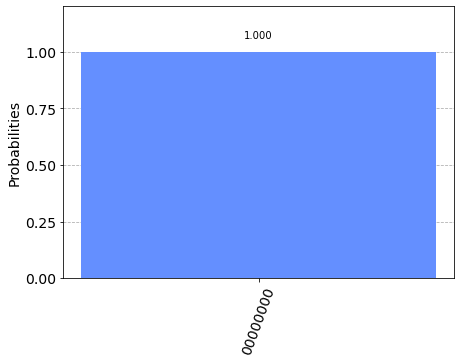

In [5]:
sim = Aer.get_backend("aer_simulator")
result = sim.run(qc_output).result()
counts = result.get_counts()
plot_histogram(counts)

In [6]:
# create Circuit with classical bits
n_qbits = 2
n_cbits = 2
fst_qubit, fst_cbit = 0, 0
sec_qubit, sec_cbit  = 1, 1

qc = QuantumCircuit(n_qbits, n_cbits)
qc.x(fst_qubit)
qc.cx(fst_qubit, sec_qubit)
qc.measure(fst_qubit, fst_cbit)
qc.measure(sec_qubit, sec_cbit)
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

## Qiskit Gates

In [7]:
# NOT gate
qc_mnot = QuantumCircuit(4, 2)
qc_mnot.x(0)
qc_mnot.barrier()
# CNOT gate
qc_mnot.cx(0, 1) # (control qubit, target qubit)
# CCNOT gate
qc_mnot.ccx(0, 1, 2) # (control qubit, control qubit, target qubit)
qc_mnot.barrier()
# measure
qc_mnot.measure(2, 0)
qc_mnot.measure(3, 1)
qc_mnot.draw()

┌───┐ ░            ░       
q_0: ┤ X ├─░───■────■───░───────
     └───┘ ░ ┌─┴─┐  │   ░       
q_1: ──────░─┤ X ├──■───░───────
           ░ └───┘┌─┴─┐ ░ ┌─┐   
q_2: ──────░──────┤ X ├─░─┤M├───
           ░      └───┘ ░ └╥┘┌─┐
q_3: ──────░────────────░──╫─┤M├
           ░            ░  ║ └╥┘
c: 2/══════════════════════╩══╩═
                           0  1

In [8]:
# Pauli Gates Y, Z
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli')


E:\anaconda\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

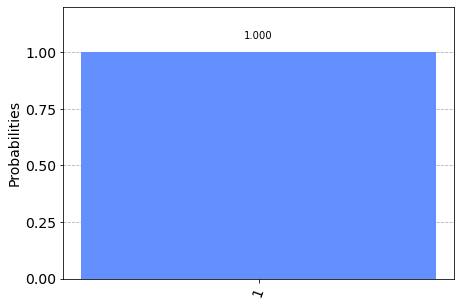

In [9]:
# x-measurement
# Create the X-measurement function:
def x_measurement(qc, qubit, cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    return qc

initial_state = [1/sqrt(2), -1/sqrt(2)]
# Initialize our qubit and measure it
qc_xm = QuantumCircuit(1,1)
qc_xm.initialize(initial_state, 0)
x_measurement(qc_xm, 0, 0)  # measure qubit 0 to classical bit 0
qc_xm.draw()
counts = sim.run(qc_xm).result().get_counts()
plot_histogram(counts)

In [10]:
# P-gate(Phase gate)
qc_g = QuantumCircuit(1)
qc_g.p(pi/4, 0)
qc_g.draw()

┌────────┐
q_0: ┤ P(π/4) ├
     └────────┘

In [11]:
# I, S and T-gates
qc_g.s(0)
qc_g.sdg(0)
qc_g.t(0)
qc_g.tdg(0)
qc_g.draw()

┌────────┐┌───┐┌─────┐┌───┐┌─────┐
q_0: ┤ P(π/4) ├┤ S ├┤ Sdg ├┤ T ├┤ Tdg ├
     └────────┘└───┘└─────┘└───┘└─────┘

E:\anaconda\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


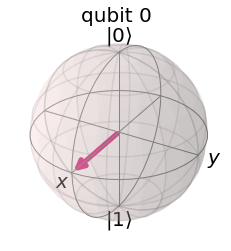

In [12]:
# u gate
from qiskit.visualization import plot_bloch_multivector, plot_histogram

qc_u = QuantumCircuit(1)
qc_u.u(pi/2, 0, pi, 0)
qc_u.draw()
qc_u.save_statevector()
state = sim.run(qc_u).result().get_statevector()
plot_bloch_multivector(state)

E:\anaconda\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


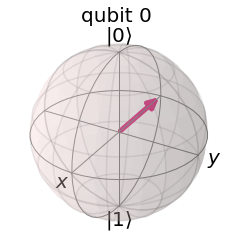

In [13]:
# hadamard gate#
qc_h = QuantumCircuit(1)
qc_h.x(0)
qc_h.h(0)
qc_h.save_statevector()
state = sim.run(qc_h).result().get_statevector()
plot_bloch_multivector(state)


E:\anaconda\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


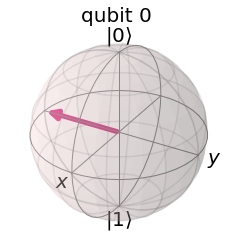

In [20]:
# sx gate (sqrt x gate: x = sx * sx)
qc_sx = QuantumCircuit(1)
qc_sx.sx(0)
qc_sx.save_statevector()
# show
state = sim.run(qc_sx).result().get_statevector()
plot_bloch_multivector(state)

## [State Vector](https://qiskit.org/textbook/ch-states/representing-qubit-states.html)

output state vector:  [0.+0.j 1.+0.j]
output histogram:


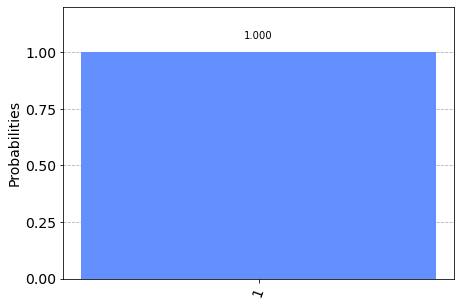

In [14]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

coeff1, coeff2 = 0, 1 # or
i_qubit = 0
# coeff1, coeff2 = 0 + 0j, 1 + 0j # j stands for indeterminate
qc_stv = QuantumCircuit(1)
initial_state = [coeff1, coeff2]
qc_stv.initialize(initial_state, i_qubit)
# save state vector for result
qc_stv.save_statevector()
rlt = sim.run(qc_stv).result()
# output state vector
out_state = rlt.get_statevector()
print("output state vector: ", out_state)
#output histogram
counts = rlt.get_counts()
print("output histogram:")
plot_histogram(counts)


[0.5+0.5j 0.5-0.5j]


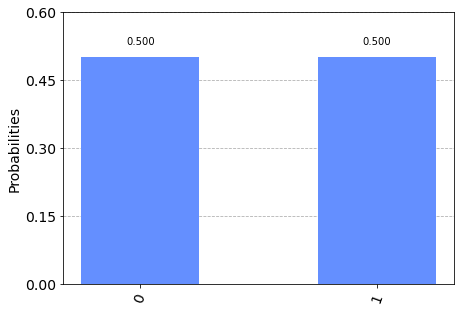

In [15]:
# other initial state
initial_state = [1/sqrt(2), 1j/sqrt(2)]
qc_stv1 = QuantumCircuit(1)
qc_stv1.initialize(initial_state, 0)
qc_stv1.save_statevector()
# show
rlt = sim.run(qc_stv1).result()
print(rlt.get_statevector())
plot_histogram(rlt.get_counts())


## Bloch vector

E:\anaconda\lib\site-packages\qiskit\visualization\bloch.py:397: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  self.axes = Axes3D(self.fig, azim=self.view[0], elev=self.view[1])
E:\anaconda\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


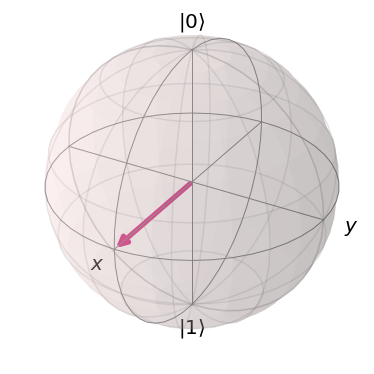

In [16]:
from qiskit_textbook.widgets import plot_bloch_vector_spherical
coords = [pi/2, 0, 1] # [theta, phi, radius]
plot_bloch_vector_spherical(coords)

In [17]:
from qiskit_textbook.widgets import bloch_calc
bloch_calc()

E:\anaconda\lib\site-packages\qiskit\visualization\bloch.py:397: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  self.axes = Axes3D(self.fig, azim=self.view[0], elev=self.view[1])
E:\anaconda\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


HTML(value='<pre></pre>')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01h\x00\x00\x01h\x08\x06\x00\x00\x00z\xe5a\xd5\x00\…

## [Finance + Quantum Computing](https://qiskit.org/documentation/tutorials/finance/index.html)

### [Porfolio Optimization](https://qiskit.org/documentation/tutorials/finance/01_portfolio_optimization.html)

In [18]:
from qiskit import Aer
from qiskit.circuit.library import TwoLocal
from qiskit.aqua import QuantumInstance
from qiskit.finance.applications.ising import portfolio
from qiskit.optimization.applications.ising.common import sample_most_likely
from qiskit.finance.data_providers import RandomDataProvider
from qiskit.aqua.algorithms import VQE, QAOA, NumPyMinimumEigensolver
from qiskit.aqua.components.optimizers import COBYLA
import numpy as np
import matplotlib.pyplot as plt
import datetime

ModuleNotFoundError: No module named 'qiskit.aqua'

In [ ]:
# The idea of hamiltonian is minimize the difference between risk and return values
num_assets = 4

# Generate expected return and covariance matrix from (random) time-series
stocks = [("TICKER%s" % i) for i in range(num_assets)]
data = RandomDataProvider(tickers=stocks,
                 start=datetime.datetime(2016,1,1),
                 end=datetime.datetime(2016,1,30))
data.run()
mu = data.get_period_return_mean_vector()
print(mu)
sigma = data.get_period_return_covariance_matrix()
print(sigma)

[ 0.00518275 -0.00135657 -0.00472237 -0.00010395]
[[ 8.31058382e-04 -1.44049369e-05 -7.64244494e-05  7.52102040e-05]
 [-1.44049369e-05  1.31984111e-04 -1.97506230e-05 -3.55715874e-06]
 [-7.64244494e-05 -1.97506230e-05  3.00851463e-04 -1.11241194e-06]
 [ 7.52102040e-05 -3.55715874e-06 -1.11241194e-06  1.29575746e-04]]


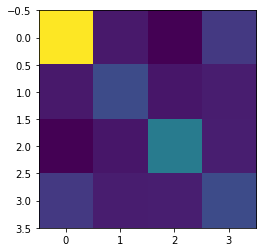

In [ ]:
# plot sigma
plt.imshow(sigma, interpolation='nearest')
plt.show()

In [ ]:
q = 0.5                   # set risk factor
budget = num_assets // 2  # set budget
penalty = num_assets      # set parameter to scale the budget penalty term

qubitOp, offset = portfolio.get_operator(mu, sigma, q, budget, penalty)

In [ ]:
def index_to_selection(i, num_assets):
    s = "{0:b}".format(i).rjust(num_assets)
    x = np.array([1 if s[i]=='1' else 0 for i in reversed(range(num_assets))])
    return x

def print_result(result):
    selection = sample_most_likely(result.eigenstate)
    value = portfolio.portfolio_value(selection, mu, sigma, q, budget, penalty)
    print('Optimal: selection {}, value {:.4f}'.format(selection, value))

    eigenvector = result.eigenstate if isinstance(result.eigenstate, np.ndarray) else result.eigenstate.to_matrix()
    probabilities = np.abs(eigenvector)**2
    i_sorted = reversed(np.argsort(probabilities))
    print('\n----------------- Full result ---------------------')
    print('selection\tvalue\t\tprobability')
    print('---------------------------------------------------')
    for i in i_sorted:
        x = index_to_selection(i, num_assets)
        value = portfolio.portfolio_value(x, mu, sigma, q, budget, penalty)
        probability = probabilities[i]
        print('%10s\t%.4f\t\t%.4f' %(x, value, probability))

### Classical eigensolver

In [ ]:
exact_eigensolver = NumPyMinimumEigensolver(qubitOp)
result = exact_eigensolver.run()

print_result(result)

E:\anaconda\lib\site-packages\qiskit\aqua\algorithms\minimum_eigen_solvers\minimum_eigen_solver.py:36: DeprecationWarning: The package qiskit.aqua.algorithms.minimum_eigen_solvers is deprecated. It was moved/refactored to qiskit.algorithms.minimum_eigen_solvers (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  warn_package('aqua.algorithms.minimum_eigen_solvers',
E:\anaconda\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver.py:36: DeprecationWarning: The package qiskit.aqua.algorithms.eigen_solvers is deprecated. It was moved/refactored to qiskit.algorithms.eigen_solvers (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  warn_package('aqua.algorithms.eigen_solvers',
E:\anaconda\lib\site-packages\qiskit\aqua\operators\state_fns\vector_state_fn.py:215: DeprecationWarning: The variable qiskit.aqua.aqua_global

Optimal: selection [1 0 0 1], value -0.0045

----------------- Full result ---------------------
selection	value		probability
---------------------------------------------------
 [1 0 0 1]	-0.0045		1.0000
 [1 1 1 1]	16.0017		0.0000
 [0 1 1 1]	4.0064		0.0000
 [1 0 1 1]	4.0003		0.0000
 [0 0 1 1]	0.0050		0.0000
 [1 1 0 1]	3.9969		0.0000
 [0 1 0 1]	0.0016		0.0000
 [0 0 0 1]	4.0002		0.0000
 [1 1 1 0]	4.0014		0.0000
 [0 1 1 0]	0.0063		0.0000
 [1 0 1 0]	0.0000		0.0000
 [0 0 1 0]	4.0049		0.0000
 [1 1 0 0]	-0.0034		0.0000
 [0 1 0 0]	4.0014		0.0000
 [1 0 0 0]	3.9952		0.0000
 [0 0 0 0]	16.0000		0.0000


### [VQE Eigensolver](https://qiskit.org/documentation/tutorials/algorithms/04_vqe_advanced.html)

In [ ]:
backend = Aer.get_backend('statevector_simulator')
seed = 50

cobyla = COBYLA()
cobyla.set_options(maxiter=500)
ry = TwoLocal(qubitOp.num_qubits, 'ry', 'cz', reps=3, entanglement='full')
vqe = VQE(qubitOp, ry, cobyla)
vqe.random_seed = seed

quantum_instance = QuantumInstance(backend=backend, seed_simulator=seed, seed_transpiler=seed)

result = vqe.run(quantum_instance)

print_result(result)

E:\anaconda\lib\site-packages\qiskit\aqua\components\optimizers\optimizer.py:49: DeprecationWarning: The package qiskit.aqua.components.optimizers is deprecated. It was moved/refactored to qiskit.algorithms.optimizers (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  warn_package('aqua.components.optimizers',
E:\anaconda\lib\site-packages\qiskit\aqua\algorithms\vq_algorithm.py:70: DeprecationWarning: The class qiskit.aqua.algorithms.VQAlgorithm is deprecated. It was moved/refactored to qiskit.algorithms.VariationalAlgorithm (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  warn_class('aqua.algorithms.VQAlgorithm',
E:\anaconda\lib\site-packages\qiskit\aqua\quantum_instance.py:135: DeprecationWarning: The class qiskit.aqua.QuantumInstance is deprecated. It was moved/refactored to qiskit.utils.QuantumInstance (pip install qis

Optimal: selection [0. 1. 1. 0.], value 0.0063

----------------- Full result ---------------------
selection	value		probability
---------------------------------------------------
 [0 1 1 0]	0.0063		0.7330
 [1 0 1 0]	0.0000		0.1853
 [0 1 0 1]	0.0016		0.0560
 [0 0 1 1]	0.0050		0.0130
 [1 0 0 1]	-0.0045		0.0115
 [1 1 0 0]	-0.0034		0.0008
 [1 0 1 1]	4.0003		0.0002
 [1 1 0 1]	3.9969		0.0002
 [1 0 0 0]	3.9952		0.0000
 [0 1 1 1]	4.0064		0.0000
 [0 0 0 1]	4.0002		0.0000
 [1 1 1 1]	16.0017		0.0000
 [1 1 1 0]	4.0014		0.0000
 [0 1 0 0]	4.0014		0.0000
 [0 0 0 0]	16.0000		0.0000
 [0 0 1 0]	4.0049		0.0000


### [QAOA](https://qiskit.org/documentation/stubs/qiskit.algorithms.QAOA.html) Eigensolver

In [ ]:
# by using QAOA
backend = Aer.get_backend('statevector_simulator')
seed = 50

cobyla = COBYLA()
cobyla.set_options(maxiter=250)
qaoa = QAOA(qubitOp, cobyla, 3)

qaoa.random_seed = seed

quantum_instance = QuantumInstance(backend=backend, seed_simulator=seed, seed_transpiler=seed)

result = qaoa.run(quantum_instance)

print_result(result)

E:\anaconda\lib\site-packages\qiskit\aqua\components\variational_forms\variational_form.py:48: DeprecationWarning: The package qiskit.aqua.components.variational_forms is deprecated. For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  warn_package('aqua.components.variational_forms')


Optimal: selection [1. 0. 0. 1.], value -0.0045

----------------- Full result ---------------------
selection	value		probability
---------------------------------------------------
 [1 0 0 1]	-0.0045		0.1689
 [1 1 0 0]	-0.0034		0.1684
 [1 0 1 0]	0.0000		0.1670
 [0 1 0 1]	0.0016		0.1664
 [0 0 1 1]	0.0050		0.1649
 [0 1 1 0]	0.0063		0.1644
 [0 1 1 1]	4.0064		0.0000
 [0 0 1 0]	4.0049		0.0000
 [0 0 0 0]	16.0000		0.0000
 [1 1 1 0]	4.0014		0.0000
 [1 0 0 0]	3.9952		0.0000
 [1 1 1 1]	16.0017		0.0000
 [0 1 0 0]	4.0014		0.0000
 [1 0 1 1]	4.0003		0.0000
 [0 0 0 1]	4.0002		0.0000
 [1 1 0 1]	3.9969		0.0000


### [Qiskit Nature](https://github.com/qiskit-community/qiskit-application-modules-demo-sessions/blob/main/qiskit-nature/Qiskit_Nature_YouTube_Tutorial.ipynb)